In [ ]:
import pandas as pd

In [ ]:
import torch
torch.cuda.is_available()

/home/noaai/.conda/envs/st/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


False

In [ ]:
df_1 = pd.read_csv('ll_users_des_label_0.csv')
df_2 = pd.read_csv('ll_users_des_label_1.csv')
df_3 = pd.read_csv('ll_users_des_label_2.csv')
df_4 = pd.read_csv('ll_users_des_label_4.csv')
df_5 = pd.read_csv('ll_users_des_label_6.csv')
df_6 = pd.read_csv('ll_users_des_label_7.csv')
df_7 = pd.read_csv('ll_users_des_label_8.csv')
df_8 = pd.read_csv('ll_users_des_label_9.csv')
df_9 = pd.read_csv('ll_users_des_label_10.csv')
df_10 = pd.read_csv('ll_users_des_label_11.csv')
df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_10,df_9])

In [ ]:
unique_screen_names_df = df.drop_duplicates(subset=['screen_name'])
df = unique_screen_names_df

In [ ]:
unique_screen_names_df.shape

(1195131, 10)

In [ ]:
df[df['label'] == 1]

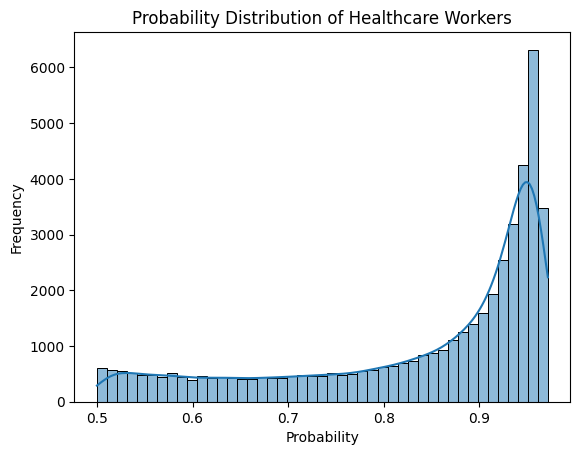

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with a 'label' column and a 'probs' column

# Filter the dataframe for label=1 (healthcare workers) and select the 'probs' column
hcw_probs = df[df['label'] == 1]['probs']

# Plot the distribution using seaborn
sns.histplot(hcw_probs, kde=True)

# Set plot title and labels
plt.title("Probability Distribution of Healthcare Workers")
plt.xlabel("Probability")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [ ]:
df

In [ ]:
import numpy as np

# Filter the DataFrame to only include rows where label is 1
df_label_1 = df[df['label'] == 1]

# Calculate the absolute difference between the probs column and 0.5
probs_diff = np.abs(df_label_1['probs'] - 0.5)

# Get the indices of the rows sorted by the absolute difference in probs
sorted_indices = np.argsort(probs_diff)

# Take the first 100 indices to get a sample of 100 accounts
sample_indices = sorted_indices[:100]

# Use the sample_indices to select the rows from the original DataFrame
sample_df = df_label_1.iloc[sample_indices]


In [ ]:
sample_df.to_csv('random_100_0_5.csv')

In [ ]:
# Filter the DataFrame to only include rows where label is 1
df_label_1 = df[df['label'] == 1]

# Sort the DataFrame by the probs column in descending order
sorted_df = df_label_1.sort_values('probs', ascending=False)

# Select the first row (with the highest probability)
highest_prob_row = sorted_df.iloc[:100]

# Print the result
highest_prob_row


In [ ]:
highest_prob_row.to_csv('random_100_high.csv')

In [ ]:
# Reset the indices to ensure they are continuous and sorted
df_label_1 = df[df['label'] == 1]

df_label_1 = df_label_1.reset_index(drop=True)

# Calculate the median of the probs column
probs_median = df_label_1['probs'].median()

# Calculate the absolute difference between the probs column and the median
probs_diff = np.abs(df_label_1['probs'] - probs_median)

# Sort the absolute differences in ascending order
sorted_diff = probs_diff.sort_values()

# Get the indices of the 100 rows closest to the median
top_100_indices = sorted_diff.index[:100]

# Use the top_100_indices to select the rows from the original DataFrame
sample_df = df_label_1.iloc[top_100_indices]

# Print the result
sample_df

In [ ]:
probs_median

0.9014008229787598

In [ ]:
sample_df.to_csv('random_100_midle.csv')

In [ ]:
df_label_1 = df[df['label'] == 1]
df_above_thresh = df_label_1[df_label_1['probs'] > 0.95]
sample_df = df_above_thresh.nsmallest(100, 'probs')
sample_df


In [ ]:
df_above_thresh.to_csv('10K_users.csv')

In [ ]:
df_above_thresh.shape

(10062, 10)

In [ ]:
sample_df.to_csv('random_100_95.csv')

In [ ]:
import pandas as pd

# Load the Excel file with predicted and true labels
df = pd.read_csv('random_100_94.csv')

# Calculate TP, FP, FN, TN
TP = ((df['Predicted Label'] == 1) & (df['True Label'] == 1)).sum()
FP = ((df['Predicted Label'] == 1) & (df['True Label'] == 0)).sum()
FN = ((df['Predicted Label'] == 0) & (df['True Label'] == 1)).sum()
TN = ((df['Predicted Label'] == 0) & (df['True Label'] == 0)).sum()

# Calculate recall and precision
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Print the results
print(f"Recall = {recall:.2f}")
print(f"Precision = {precision:.2f}")


Recall = 1.00
Precision = 0.83


In [ ]:

# Load the Excel file with predicted and true labels
df = pd.read_csv('random_100_midle.csv')

# Calculate TP, FP, FN, TN
TP = ((df['Predicted Label'] == 1) & (df['True Label'] == 1)).sum()
FP = ((df['Predicted Label'] == 1) & (df['True Label'] == 0)).sum()
FN = ((df['Predicted Label'] == 0) & (df['True Label'] == 1)).sum()
TN = ((df['Predicted Label'] == 0) & (df['True Label'] == 0)).sum()

# Calculate recall and precision
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Print the results
print(f"Recall = {recall:.2f}")
print(f"Precision = {precision:.2f}")

Recall = 1.00
Precision = 0.81
